<a href="https://colab.research.google.com/github/Mohamedragih1/SUAS-YOLOv7-shape-detection/blob/main/Mohamed%20Ashraf/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
desired_path = '/content/drive/MyDrive/Colab Data/'
os.chdir(desired_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


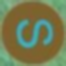

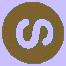

----------------------------------------------------


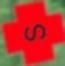

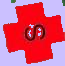

----------------------------------------------------


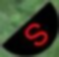

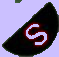

----------------------------------------------------


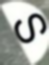

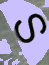

----------------------------------------------------


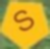

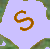

----------------------------------------------------


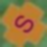

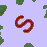

----------------------------------------------------


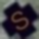

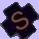

----------------------------------------------------


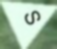

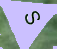

----------------------------------------------------


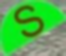

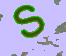

----------------------------------------------------


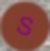

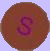

----------------------------------------------------


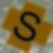

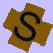

----------------------------------------------------


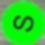

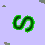

----------------------------------------------------


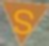

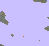

----------------------------------------------------


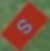

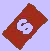

----------------------------------------------------


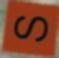

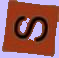

----------------------------------------------------


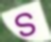

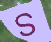

----------------------------------------------------


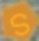

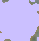

----------------------------------------------------


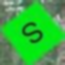

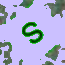

----------------------------------------------------


In [ ]:
for i in range(18):
  image = cv2.imread(f'Images/{i}_png-1.jpg')
  # Apply Gaussian blur
  blurred = cv2.GaussianBlur(image, (5, 5), 0)
  cv2_imshow(blurred)
  # Convert the image to grayscale
  gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
  # Apply adaptive thresholding
  block_size =111
  C = 10
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)
  # Invert the binary image
  thresh = cv2.bitwise_not(thresh)
  # Create a mask from the thresh image
  mask = thresh / 255
  # Multiply the original image by the mask to remove the background
  pink_background = np.zeros_like(image)
  pink_background[:, :] = (255, 192, 203)  # Set the pink color (RGB)

  # Multiply the original image by the inverted mask to keep the object
  result = cv2.multiply(image, np.dstack([mask] * 3).astype(np.uint8))

  # Multiply the pink background by the mask to fill the background with pink
  background = cv2.multiply(pink_background, np.dstack([1 - mask] * 3).astype(np.uint8))

  # Combine the object and the pink background
  final_result = cv2.add(result, background)
  cv2_imshow(final_result)
  print("----------------------------------------------------")
